In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
conf_res = np.load('../results/20210627092226/pred.npy').sum(axis=0) // 3
conf_with_mixup_res = np.load('../results/20210627081148/pred.npy').sum(axis=0) // 3 # or 20210627052324
gru_res = np.load('../results/20210627005138/pred.npy').sum(axis=0) // 3
gru_old_res = np.load('../results/20210626043459/pred.npy').sum(axis=0) // 3

test_truth = pd.read_csv('../meta/test_truth.csv')

In [9]:
ensemble = []
for i in range(len(conf_res)):
    vote_dict = {
        0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0
    }
    
    vote_dict[conf_res[i]] += 1
    vote_dict[conf_with_mixup_res[i]] += 1    
    vote_dict[gru_res[i]] += 1    
    vote_dict[gru_old_res[i]] += 1    
    
    vote_sorted = sorted(vote_dict.items(), key=lambda x:x[1])
    ensemble.append(vote_sorted[-1][0])

ensemble = np.array(ensemble)

In [10]:
ensemble

array([4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 6, 6, 6, 6, 4, 7, 7, 7, 7, 7, 3, 3,
       3, 3, 3, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 8, 8, 8, 8,
       8, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 5,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 8, 8,
       8, 8, 8, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 9, 9, 9,
       9, 9, 3, 4, 3, 3, 3, 6, 6, 6, 5, 5, 7, 7, 7, 7, 7, 8, 6, 8, 8, 8,
       0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 6, 6, 6, 6,
       6, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 8,
       8, 8, 8, 8, 0, 0, 0, 3, 0, 4, 3, 3, 3, 3])

In [11]:
def plot_confusion_matrix(predict, ground_truth, title=None, cmap=plt.cm.Blues):
    """
    予測結果の混合行列をプロット
    Args:
        predict: 予測結果
        ground_truth: 正解ラベル
        title: グラフタイトル
        cmap: 混合行列の色
    Returns:
        Nothing
    """

    cm = confusion_matrix(predict, ground_truth)
    plt.figure()
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel("Predicted")
    plt.xlabel("Ground truth")
    plt.show()

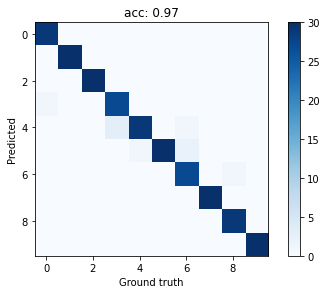

In [12]:
truth_values = test_truth['label'].values
acc = accuracy_score(truth_values, ensemble)
title = 'acc: ' + str(acc)
plot_confusion_matrix(ensemble, truth_values, title=title)